In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
class Regression():
  def __init__(self, optimization, regularization=None, lr=0.001, iterations=1000, r2_plot=True, batch_size=50, penalty=0.1):
    self.lr = lr
    self.iterations = iterations
    self.r2_plot = r2_plot
    self.optimization = optimization
    self.regularization = regularization
    self.batch_size = batch_size
    self.penalty = penalty

  def fit(self, X, y):

    if self.optimization == 'GD':
      self.m, self.n = X.shape
      self.w = np.zeros(self.n)
      self.b = 0
      self.X = X
      self.y = y
      self.r2_history = []

      if self.regularization is None:

        for i in range(self.iterations):
          hypothesis = np.dot(self.X, self.w) + self.b
          self.r2_history.append(r2_score(self.y, hypothesis))
          dw = 2*((1/self.m) * np.dot(self.X.T, (hypothesis - self.y)))
          db = 2*((1/self.m) * np.sum(hypothesis - self.y))
          self.w = self.w - self.lr * dw
          self.b = self.b - self.lr * db

      elif self.regularization == 'L1':

        for i in range(self.iterations):
          hypothesis = np.dot(self.X, self.w) + self.b
          self.r2_history.append(r2_score(self.y, hypothesis))
          dW = np.zeros(self.n)
          for j in range(self.n):
            if self.W[j] > 0:
                dW[j] = (-2 * (self.X[:, j]).dot(self.y - hypothesis) + self.penalty) / self.m
            else:
                dW[j] = (-2 * (self.X[:, j]).dot(self.y - hypothesis) - self.penalty) / self.m

          db = -2 * np.sum(self.y - hypothesis) / self.m
          self.w = self.w - self.lr * dw
          self.b = self.b - self.lr * db

      else:

        for i in range(self.iterations):
          hypothesis = np.dot(self.X, self.w) + self.b
          self.r2_history.append(r2_score(self.y, hypothesis))
          dW = ( - ( 2 * ( self.X.T ).dot( self.y - hypothesis ) ) + ( 2 * self.penalty * self.W ) ) / self.m
          db = - 2 * np.sum( self.y - hypothesis ) / self.m
          self.w = self.w - self.lr * dw
          self.b = self.b - self.lr * db

      if self.r2_plot:
        plt.plot([j for j in range(self.iterations - len(self.r2_history), self.iterations)], self.r2_history)
        plt.xlabel('Iterations')
        plt.ylabel('R2 Score')
        plt.title('R2 Score vs Iterations (After R2 Score > 0)')
        plt.show()

    if self.optimization == 'SGD':
      self.m, self.n = X.shape
      self.w = np.zeros(self.n)
      self.b = 0
      self.X = X
      self.y = y
      self.r2_history = []

      if self.regularization is None:

        for i in range(self.iterations):
          row = random.randint(0, self.m-1)
          X_new = np.array(self.X.iloc[row,:])
          y_new = np.array(self.y.iloc[row,:])
          hypothesis = np.dot(X_new, self.w) + self.b
          dw = 2*((1/self.m) * np.dot(X_new.T.reshape(-1,1), (hypothesis - y_new)))
          db = 2*((1/self.m) * np.sum(hypothesis - y_new))
          self.w = self.w - self.lr * dw
          self.b = self.b - self.lr * db

      elif self.regularization == 'L1':

        for i in range(self.iterations):
          row = random.randint(0, self.m-1)
          X_new = np.array(self.X.iloc[row,:])
          y_new = np.array(self.y.iloc[row,:])
          hypothesis = np.dot(X_new, self.w) + self.b
          dW = np.zeros(self.n)
          for j in range(self.n):
            if self.W[j] > 0:
                dW[j] = 2*((1/self.m) * np.dot(X_new.T.reshape(-1,1), (hypothesis - y_new))) + self.penalty/self.m
            else:
                dW[j] = 2*((1/self.m) * np.dot(X_new.T.reshape(-1,1), (hypothesis - y_new))) - self.penalty/self.m

          db = 2*((1/self.m) * np.sum(hypothesis - y_new))
          self.w = self.w - self.lr * dw
          self.b = self.b - self.lr * db

      else:

        for i in range(self.iterations):
          row = random.randint(0, self.m-1)
          X_new = np.array(self.X.iloc[row,:])
          y_new = np.array(self.y.iloc[row,:])
          hypothesis = np.dot(X_new, self.w) + self.b
          dw = 2*((1/self.m) * np.dot(X_new.T.reshape(-1,1), (hypothesis - y_new))) + 2*self.penalty*self.w/self.m
          db = 2*((1/self.m) * np.sum(hypothesis - y_new))
          self.w = self.w - self.lr * dw
          self.b = self.b - self.lr * db

    if self.optimization == 'MiniBatch':
      self.m, self.n = X.shape
      self.w = np.zeros(self.n)
      self.b = 0
      self.X = X
      self.y = y
      self.r2_history = []

      if self.regularization is None:

        for i in range(self.iterations):
          count = 0
          row = []
          while count < self.batch_size:
            r = random.randint(0, self.m-1)
            if r not in row:
              row.append(r)
              count += 1
          X_new = self.X.iloc[row,:]
          y_new = self.y.iloc[row,:]
          hypothesis = np.dot(X_new, self.w) + self.b
          dw = np.zeros(self.n)
          for j in range(X_new.shape[1]):
              dw[j] = (2/self.m) * np.sum(X_new.iloc[:, j].values * (hypothesis - y_new.values))
          db = 2*((1/self.m) * np.sum(hypothesis - y_new.values))
          self.w = self.w - self.lr * dw
          self.b = self.b - self.lr * db

      elif self.regularization == 'L1':

        for i in range(self.iterations):
          count = 0
          row = []
          while count < self.batch_size:
            r = random.randint(0, self.m-1)
            if r not in row:
              row.append(r)
              count += 1
          X_new = self.X.iloc[row,:]
          y_new = self.y.iloc[row,:]
          hypothesis = np.dot(X_new, self.w) + self.b
          dW = np.zeros(self.n)
          for j in range(X_new.shape[1]):
            if self.W[j] > 0:
                dW[j] = (2/self.m) * np.sum(X_new.iloc[:, j].values * (hypothesis - y_new.values)) + self.penalty/self.m
            else:
                dW[j] = (2/self.m) * np.sum(X_new.iloc[:, j].values * (hypothesis - y_new.values)) - self.penalty/self.m
          db = 2*((1/self.m) * np.sum(hypothesis - y_new.values))
          self.w = self.w - self.lr * dw
          self.b = self.b - self.lr * db

      else:

        for i in range(self.iterations):
          count = 0
          row = []
          while count < self.batch_size:
            r = random.randint(0, self.m-1)
            if r not in row:
              row.append(r)
              count += 1
          X_new = self.X.iloc[row,:]
          y_new = self.y.iloc[row,:]
          hypothesis = np.dot(X_new, self.w) + self.b
          dw = np.zeros(self.n)
          for j in range(X_new.shape[1]):
            dw[j] = (2/self.m) * np.sum(X_new.iloc[:, j].values * (hypothesis - y_new.values)) + 2*self.penalty*self.w[j]/self.m
          db = 2*((1/self.m) * np.sum(hypothesis - y_new.values))
          self.w = self.w - self.lr * dw
          self.b = self.b - self.lr * db

    return self

    def predict(self, X):
      return np.dot(X, self.w) + self.b

In [4]:
def mean_absolute_error(y, hypothesis):
      return np.mean(np.abs(y - hypothesis))

def mean_squared_error(y, hypothesis):
      return np.mean((y- hypothesis) ** 2)

def r2_score(y, hypothesis):
      ss_total = np.sum((y - np.mean(y)) ** 2)
      ss_residual = np.sum((y - hypothesis) ** 2)
      return 1 - (ss_residual / ss_total) if ss_total != 0 else 1

In [6]:
df = pd.read_csv('/content/Classified-BioFluidsLab-IITK-JDexperiment.csv')
df.head()

,d,B,Q,dT,E
0,1.935247e-09,5.807790,1.771646,15.705398,-3.221133
1,4.758500e-09,5.269716,2.564045,9.550877,0.652858
2,3.686770e-09,3.510369,NaN,13.793920,NaN
3,3.033427e-09,4.932127,2.510767,47.348940,-0.819294
4,8.644913e-10,3.650966,1.413866,88.453402,-40.038999


In [7]:
df = df.dropna()

for column in ['d', 'B', 'Q', 'dT']:
  print(f'{column}: {min(df[column])} - {max(df[column])}')

df.shape

d: 1.0002712971111618e-10 - 4.999961007284534e-09
B: 4.778609163147429e-05 - 9.999893848262149
Q: 0.5000103418217814 - 4.99990667638389
dT: 0.0002227295707202 - 99.99946092561706


(81598, 5)

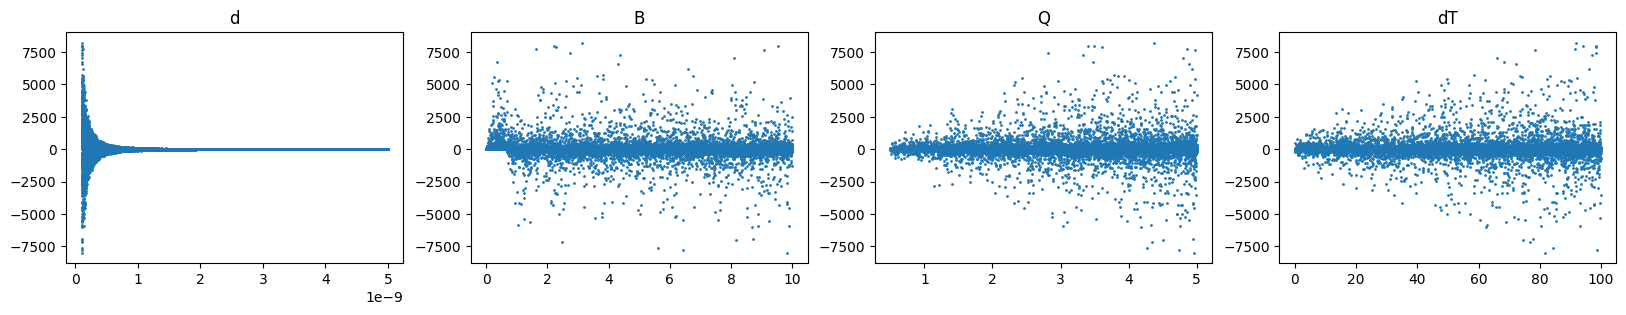

In [8]:
plt.figure(figsize=(20,3))

for i, column in enumerate(['d', 'B', 'Q', 'dT']):
  plt.subplot(1,4,i+1)
  plt.scatter(df[column], df['E'], s=1)
  plt.title(column)
plt.show()

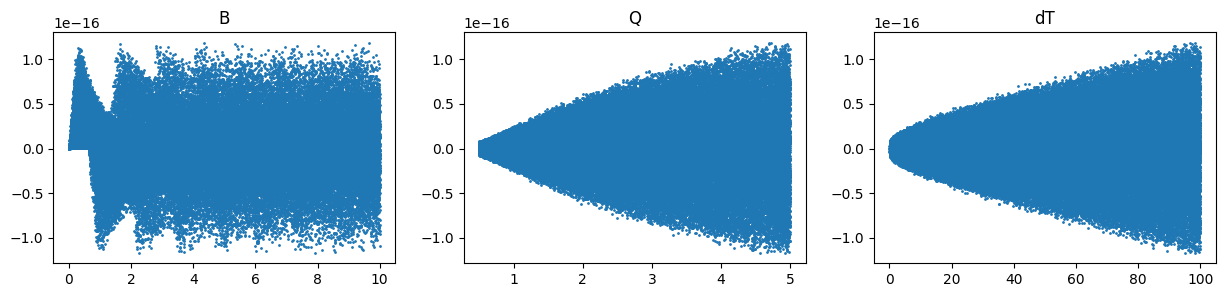

In [9]:
df['E x d^2'] = df['d']**2 * df['E']

plt.figure(figsize=(15,3))
for i, column in enumerate(['B', 'Q', 'dT']):
  plt.subplot(1,3,i+1)
  plt.scatter(df[column], df['E x d^2'], s=1)
  plt.title(column)
plt.show()

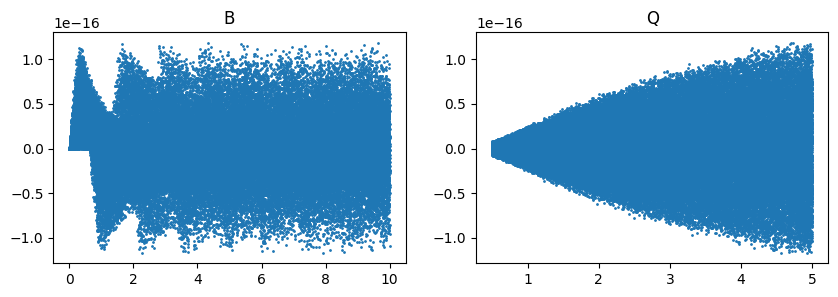

In [37]:
df['E x d^2 x e^(-1/(dT^4))'] = df['E x d^2'] * np.exp(-1/(df['dT'])**4)

plt.figure(figsize=(10,3))
for i, column in enumerate(['B', 'Q']):
  plt.subplot(1,2,i+1)
  plt.scatter(df[column], df['E x d^2 x e^(-1/(dT^4))'], s=1)
  plt.title(column)
plt.show()

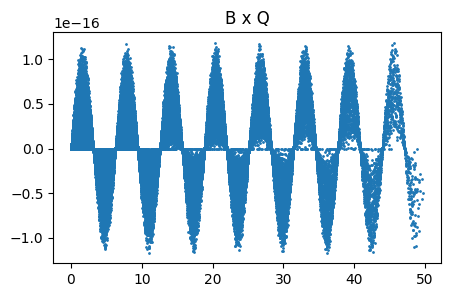

In [38]:
df['B x Q'] = df['B'] * df['Q']

plt.figure(figsize=(5,3))
plt.scatter(df['B x Q'], df['E x d^2 x e^(-1/(dT^4))'], s=1)
plt.title('B x Q')
plt.show()

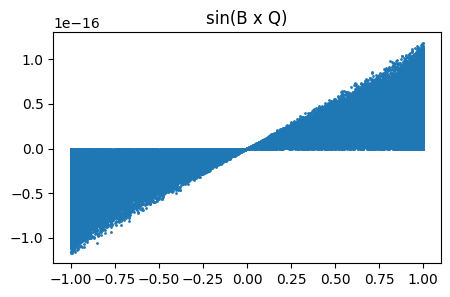

In [39]:
df['sin(B x Q)'] = np.sin(df['B x Q'])

plt.figure(figsize=(5,3))
plt.scatter(df['sin(B x Q)'], df['E x d^2 x e^(-1/(dT^4))'], s=1)
plt.title('sin(B x Q)')
plt.show()

In [72]:
features = pd.DataFrame()
for i in range (1, 10):
  for j in range(-8, 9, 2):
    features[f'sin({i}B x Q) x e^(-10^{j}/(dT^4)) / d^2'] = np.sin(i*df['B']*df['Q']) * np.exp(-(10**j)/(df['dT'])**4) / df['d']**2
features

,sin(1B x Q) x e^(-10^-8/(dT^4)) / d^2,sin(1B x Q) x e^(-10^-6/(dT^4)) / d^2,sin(1B x Q) x e^(-10^-4/(dT^4)) / d^2,sin(1B x Q) x e^(-10^-2/(dT^4)) / d^2,sin(1B x Q) x e^(-10^0/(dT^4)) / d^2,sin(1B x Q) x e^(-10^2/(dT^4)) / d^2,sin(1B x Q) x e^(-10^4/(dT^4)) / d^2,sin(1B x Q) x e^(-10^6/(dT^4)) / d^2,sin(1B x Q) x e^(-10^8/(dT^4)) / d^2,sin(2B x Q) x e^(-10^-8/(dT^4)) / d^2,...,sin(8B x Q) x e^(-10^8/(dT^4)) / d^2,sin(9B x Q) x e^(-10^-8/(dT^4)) / d^2,sin(9B x Q) x e^(-10^-6/(dT^4)) / d^2,sin(9B x Q) x e^(-10^-4/(dT^4)) / d^2,sin(9B x Q) x e^(-10^-2/(dT^4)) / d^2,sin(9B x Q) x e^(-10^0/(dT^4)) / d^2,sin(9B x Q) x e^(-10^2/(dT^4)) / d^2,sin(9B x Q) x e^(-10^4/(dT^4)) / d^2,sin(9B x Q) x e^(-10^6/(dT^4)) / d^2,sin(9B x Q) x e^(-10^8/(dT^4)) / d^2
0,-2.031455e+17,-2.031455e+17,-2.031455e+17,-2.031454e+17,-2.031421e+17,-2.028118e+17,-1.723555e+17,-1.477779e+10,-0.000000e+00,2.636696e+17,...,0.000000e+00,-2.663016e+17,-2.663016e+17,-2.663016e+17,-2.663016e+17,-2.662973e+17,-2.658643e+17,-2.259393e+17,-1.937208e+10,-0.000000e+00
1,3.580489e+16,3.580489e+16,3.580488e+16,3.580484e+16,3.580058e+16,3.537716e+16,1.076498e+16,2.296405e-36,0.000000e+00,4.192066e+16,...,0.000000e+00,3.502943e+16,3.502943e+16,3.502943e+16,3.502939e+16,3.502522e+16,3.461097e+16,1.053184e+16,2.246670e-36,0.000000e+00
3,-1.977172e+16,-1.977172e+16,-1.977172e+16,-1.977172e+16,-1.977171e+16,-1.977133e+16,-1.973242e+16,-1.620461e+16,-4.523314e+07,-3.888349e+16,...,-2.471986e+08,-1.083640e+17,-1.083640e+17,-1.083640e+17,-1.083640e+17,-1.083640e+17,-1.083619e+17,-1.081486e+17,-8.881356e+16,-2.479120e+08
4,-1.205100e+18,-1.205100e+18,-1.205100e+18,-1.205100e+18,-1.205100e+18,-1.205098e+18,-1.204903e+18,-1.185574e+18,-2.352698e+17,-1.047461e+18,...,-1.148274e+17,8.268181e+17,8.268181e+17,8.268181e+17,8.268181e+17,8.268181e+17,8.268167e+17,8.266830e+17,8.134210e+17,1.614183e+17
5,-1.166264e+18,-1.166264e+18,-1.166264e+18,-1.166264e+18,-1.166263e+18,-1.166136e+18,-1.153577e+18,-3.906422e+17,-3.673021e-30,-1.144427e+18,...,-3.455470e-30,1.296175e+17,1.296175e+17,1.296175e+17,1.296175e+17,1.296174e+17,1.296033e+17,1.282075e+17,4.341562e+16,4.082162e-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,-7.225553e+16,-7.225553e+16,-7.225553e+16,-7.225553e+16,-7.225550e+16,-7.225246e+16,-7.194900e+16,-4.723222e+16,-2.486550e-02,-1.365893e+17,...,-3.519356e-02,-3.258590e+16,-3.258590e+16,-3.258590e+16,-3.258590e+16,-3.258589e+16,-3.258452e+16,-3.244766e+16,-2.130085e+16,-1.121388e-02
99996,5.891583e+16,5.891583e+16,5.891583e+16,5.891583e+16,5.891573e+16,5.890515e+16,5.785741e+16,9.614588e+15,1.096724e-62,-5.023778e+16,...,-4.520342e-63,-4.431480e+16,-4.431480e+16,-4.431480e+16,-4.431480e+16,-4.431472e+16,-4.430677e+16,-4.351869e+16,-7.231817e+15,-8.249243e-63
99997,8.434280e+15,8.434280e+15,8.434280e+15,8.434280e+15,8.434279e+15,8.434203e+15,8.426599e+15,7.699824e+15,9.318121e+11,1.678773e+16,...,6.725687e+12,6.656117e+16,6.656117e+16,6.656117e+16,6.656117e+16,6.656116e+16,6.656056e+16,6.650055e+16,6.076503e+16,7.353621e+12
99998,-1.539469e+17,-1.539469e+17,-1.539469e+17,-1.539469e+17,-1.539469e+17,-1.539466e+17,-1.539227e+17,-1.515486e+17,-3.202401e+16,1.434408e+16,...,-1.167771e+16,-1.407551e+17,-1.407551e+17,-1.407551e+17,-1.407551e+17,-1.407551e+17,-1.407548e+17,-1.407330e+17,-1.385623e+17,-2.927985e+16


In [67]:
features.describe()

,sin(1B x Q) x e^(-10^-8/(dT^4)) / d^2,sin(1B x Q) x e^(-10^-6/(dT^4)) / d^2,sin(1B x Q) x e^(-10^-4/(dT^4)) / d^2,sin(1B x Q) x e^(-10^-2/(dT^4)) / d^2,sin(1B x Q) x e^(-10^0/(dT^4)) / d^2,sin(1B x Q) x e^(-10^2/(dT^4)) / d^2,sin(1B x Q) x e^(-10^4/(dT^4)) / d^2,sin(1B x Q) x e^(-10^6/(dT^4)) / d^2,sin(1B x Q) x e^(-10^8/(dT^4)) / d^2,sin(2B x Q) x e^(-10^-8/(dT^4)) / d^2,...,sin(8B x Q) x e^(-10^8/(dT^4)) / d^2,sin(9B x Q) x e^(-10^-8/(dT^4)) / d^2,sin(9B x Q) x e^(-10^-6/(dT^4)) / d^2,sin(9B x Q) x e^(-10^-4/(dT^4)) / d^2,sin(9B x Q) x e^(-10^-2/(dT^4)) / d^2,sin(9B x Q) x e^(-10^0/(dT^4)) / d^2,sin(9B x Q) x e^(-10^2/(dT^4)) / d^2,sin(9B x Q) x e^(-10^4/(dT^4)) / d^2,sin(9B x Q) x e^(-10^6/(dT^4)) / d^2,sin(9B x Q) x e^(-10^8/(dT^4)) / d^2
count,8.159800e+04,8.159800e+04,8.159800e+04,8.159800e+04,8.159800e+04,8.159800e+04,8.159800e+04,8.159800e+04,8.159800e+04,8.159800e+04,...,8.159800e+04,8.159800e+04,8.159800e+04,8.159800e+04,8.159800e+04,8.159800e+04,8.159800e+04,8.159800e+04,8.159800e+04,8.159800e+04
mean,1.465144e+17,1.463311e+17,1.457337e+17,1.456923e+17,1.422420e+17,1.351112e+17,1.212747e+17,8.507334e+16,4.254619e+15,7.211873e+16,...,-2.136738e+15,-8.229323e+15,-8.060694e+15,-7.538194e+15,-7.922438e+15,-7.500727e+15,-5.972357e+15,-3.847508e+15,5.403002e+15,-1.025409e+14
std,5.856048e+18,5.854577e+18,5.849960e+18,5.847295e+18,5.816249e+18,5.716512e+18,5.416040e+18,4.325709e+18,6.020472e+17,5.859969e+18,...,6.303357e+17,5.799320e+18,5.797694e+18,5.793773e+18,5.790457e+18,5.753439e+18,5.660580e+18,5.352518e+18,4.309056e+18,6.174129e+17
min,-9.754356e+19,-9.754356e+19,-9.754356e+19,-9.754355e+19,-9.754296e+19,-9.748418e+19,-9.415931e+19,-9.261769e+19,-2.443841e+19,-9.842188e+19,...,-3.352438e+19,-9.882243e+19,-9.882243e+19,-9.882243e+19,-9.882243e+19,-9.882242e+19,-9.882197e+19,-9.877692e+19,-9.437399e+19,-2.757010e+19
25%,-7.687879e+16,-7.683289e+16,-7.671389e+16,-7.643235e+16,-7.526397e+16,-7.202611e+16,-6.227016e+16,-3.534669e+16,-1.074076e+07,-8.198112e+16,...,-3.429863e+09,-8.931839e+16,-8.926195e+16,-8.916727e+16,-8.886137e+16,-8.766798e+16,-8.392972e+16,-7.267739e+16,-4.100931e+16,-7.265552e+09
50%,1.324842e+16,1.322689e+16,1.311136e+16,1.289146e+16,1.192416e+16,8.706287e+15,6.820756e+14,3.205804e-154,0.000000e+00,7.754195e+15,...,0.000000e+00,9.387457e+14,9.209574e+14,8.561941e+14,6.146706e+14,2.795456e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.038515e+17,1.038025e+17,1.036702e+17,1.032622e+17,1.021398e+17,9.795063e+16,8.431562e+16,4.823796e+16,5.555639e+11,9.724949e+16,...,2.875535e+10,9.085092e+16,9.083351e+16,9.077683e+16,9.030253e+16,8.910039e+16,8.534507e+16,7.347606e+16,4.207478e+16,1.649477e+10
max,9.839082e+19,9.839082e+19,9.839082e+19,9.839082e+19,9.839081e+19,9.838989e+19,9.829825e+19,9.643059e+19,3.348891e+19,9.988902e+19,...,2.415218e+19,9.903872e+19,9.903872e+19,9.903872e+19,9.903872e+19,9.903868e+19,9.903456e+19,9.862362e+19,8.891216e+19,2.377582e+19


In [68]:
for column in features.columns:
  features[column] = (features[column] - np.mean(features[column])) / np.std(features[column])

features.head()

,sin(1B x Q) x e^(-10^-8/(dT^4)) / d^2,sin(1B x Q) x e^(-10^-6/(dT^4)) / d^2,sin(1B x Q) x e^(-10^-4/(dT^4)) / d^2,sin(1B x Q) x e^(-10^-2/(dT^4)) / d^2,sin(1B x Q) x e^(-10^0/(dT^4)) / d^2,sin(1B x Q) x e^(-10^2/(dT^4)) / d^2,sin(1B x Q) x e^(-10^4/(dT^4)) / d^2,sin(1B x Q) x e^(-10^6/(dT^4)) / d^2,sin(1B x Q) x e^(-10^8/(dT^4)) / d^2,sin(2B x Q) x e^(-10^-8/(dT^4)) / d^2,...,sin(8B x Q) x e^(-10^8/(dT^4)) / d^2,sin(9B x Q) x e^(-10^-8/(dT^4)) / d^2,sin(9B x Q) x e^(-10^-6/(dT^4)) / d^2,sin(9B x Q) x e^(-10^-4/(dT^4)) / d^2,sin(9B x Q) x e^(-10^-2/(dT^4)) / d^2,sin(9B x Q) x e^(-10^0/(dT^4)) / d^2,sin(9B x Q) x e^(-10^2/(dT^4)) / d^2,sin(9B x Q) x e^(-10^4/(dT^4)) / d^2,sin(9B x Q) x e^(-10^6/(dT^4)) / d^2,sin(9B x Q) x e^(-10^8/(dT^4)) / d^2
0,-0.059710,-0.059693,-0.059638,-0.059658,-0.059383,-0.059114,-0.054215,-0.019667,-0.007067,0.032688,...,0.00339,-0.044501,-0.044542,-0.044663,-0.044622,-0.044981,-0.045913,-0.041493,-0.001254,0.000166
1,-0.018905,-0.018879,-0.018791,-0.018793,-0.018301,-0.017447,-0.020404,-0.019667,-0.007067,-0.005153,...,0.00339,0.007459,0.007432,0.007347,0.007418,0.007391,0.007170,0.002686,-0.001254,0.000166
3,-0.028396,-0.028372,-0.028292,-0.028298,-0.027856,-0.027094,-0.026035,-0.023413,-0.007067,-0.018943,...,0.00339,-0.017267,-0.017301,-0.017403,-0.017346,-0.017531,-0.018088,-0.019486,-0.021865,0.000166
4,-0.230808,-0.230835,-0.230915,-0.231013,-0.231653,-0.234447,-0.244863,-0.293745,-0.397852,-0.191057,...,-0.17878,0.143991,0.144003,0.144010,0.144159,0.145013,0.147122,0.155167,0.187517,0.261611
5,-0.224176,-0.224201,-0.224276,-0.224371,-0.224975,-0.227631,-0.235386,-0.109975,-0.007067,-0.207604,...,0.00339,0.023770,0.023747,0.023673,0.023753,0.023833,0.023951,0.024672,0.008822,0.000166


In [69]:
X = features
y = df.loc[X.index, 'E']

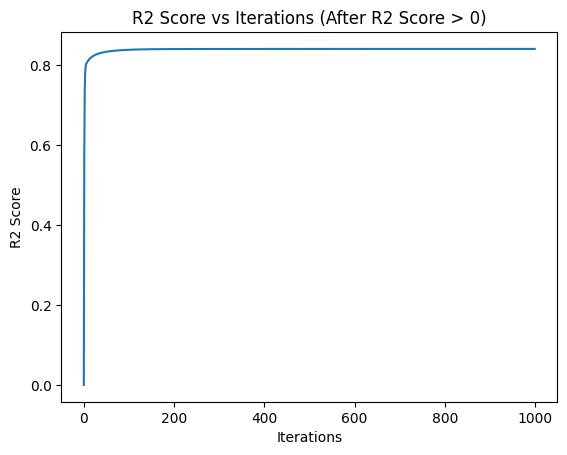

In [70]:
lr = Regression(optimization='GD', lr=0.03, iterations=1000)
lr.fit(X, y)